In [2]:
library(tidyverse)
library(cluster)
library(factoextra)

## 계층적 군집화
- k-평균 군집의 대체 방식, 군집수 지정 X, 덴드로그램

### 데이터 표준화

In [3]:
ames_scale <- AmesHousing::make_ames() %>%
  select_if(is.numeric) %>%  # select numeric columns
  select(-Sale_Price) %>%    # remove target column
  mutate_all(as.double) %>%  # coerce to double type
  scale()   

#### AGNES : 응집 군집화
- 상향식, 각 관찰값은 하나의 군집으로 간주 => 가장 유사한 두 군집이 더큰 군집(노드)로 결합 => 하나의 군집이 될 대 까지 반복

#### DIANA : 분할 계층적 군집화
- 하향식, AGNES의 역순

<img src = "https://bradleyboehmke.github.io/HOML/images/dendrogram2.png">

#### 연결법
- k-평균과 유사하게 거리측정을 사용하여 (비)유사성을 측정

1. 완전연결법 (최대) : 군집간의 비유사도 중 최대값을 거리로 간주, 더 조밀한 군집 생성
2. 단일연결법 (최소) : 최소값을 거리로 간주, 길고 느슨한 군집을 생성
3. 평균연결법 : 비유사도의 평균을 거리로 간주, 생성하는 군집의 크기가 다를 수 있음
4. 중심연결법 : 군집별 중심 간의 비유사도를 계산
5. 와드연결법 (최소분산) : 전체 군집 내 분산을 최소화, 각 단계에서 군집간 거리가 가장 작은 군집쌍이 병합, 더 조밀한 군집 생성

#### AGNES에서는 완전연결법 / 와드연결법
#### DIANA에는 평균연결법

<img src = "https://bradleyboehmke.github.io/HOML/images/dendrogram3.png">

### 집합적 계층 군집화

### ```hclust()```
- ```d``` : ```dist()```객체 (거리행렬)
- ```method``` : ["ward.D", "ward.D2", "single", "complete", "average" (= UPGMA), "mcquitty" (= WPGMA), "median" (= WPGMC) or "centroid" (= UPGMC).]

완전연결법

In [6]:
set.seed(123)
d <- dist(ames_scale, method = "euclidean")
hc1 <- hclust(d, method = "complete" )

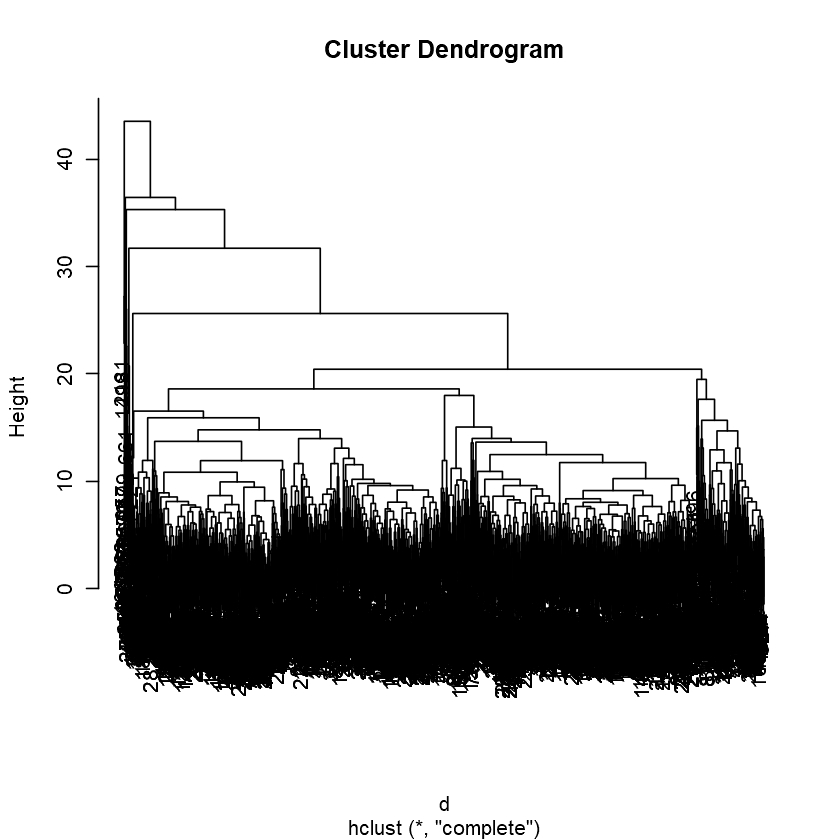

In [9]:
plot(hc1)

### ```agnes()```
- ```x``` : 데이터

#### ```ac``` : 응집계수 (군집 구조의 강도)
- **값이 1에 가까울수록 균형 잡힌 군집 구조**
- **값이 0에 가까울수록 균형이 좋지 않음**
- n이 커질수록 ac가 커짐

In [10]:
set.seed(123)
hc2 <- agnes(ames_scale, method = "complete")
hc2$ac

[1] 0.926775

### 그리드서치

In [17]:
m <- c( "average", "single", "complete", "ward")

In [23]:
acs <- vector()
for (i in 1:length(m)) {
    agness <- agnes(ames_scale, method = m[i])
    acs[i] <- agness$ac
}
names(acs) <- c( "average", "single", "complete", "ward")

In [26]:
acs 
which.max(acs)

average    single  complete      ward 
0.9139303 0.8712890 0.9267750 0.9766577

ward 
   4

- 와드연결법이 가장 높은 ac를 가짐

#### 분할적 계층 군집화



### ```diana()```
- ```x``` : 데이터



#### ```dc``` : 분할 계수 (분할의 강도)
- 1에 가까울수록 분할이 더 강함

In [27]:
hc4 <- diana(ames_scale)
hc4$dc

[1] 0.9191094

### 최적의 군집 결정
- 추출할 군집의 수를 선택 할 시

#### 엘보우기법

In [30]:
p1 <- fviz_nbclust(ames_scale, 
                   FUN = hcut, 
                   method = "wss", 
                   k.max = 10) +
  ggtitle("(A) Elbow method")

In [31]:
p2 <- fviz_nbclust(ames_scale, 
                   FUN = hcut, 
                   method = "silhouette", 
                   k.max = 10) +
  ggtitle("(B) Silhouette method")

In [ ]:
p3 <- fviz_nbclust(ames_scale, 
                   FUN = hcut, 
                   method = "gap_stat", 
                   k.max = 10) +
  ggtitle("(C) Gap statistic")

gridExtra::grid.arrange(p1, p2, p3, nrow = 1)

<img src = "https://bradleyboehmke.github.io/HOML/19-hierarchical_files/figure-html/hclust-optimal-clusters-compare-1.png">

### 덴드로그램

In [ ]:
set.seed(123)
d <- dist(ames_scale, method = "euclidean")
hc5 <- hclust(d, method = "ward.D2")

### ```factoextra::fviz_dend()```
- 덴드로그램
- ```x``` : dendrogram, hclust, agnes, diana, hcut, hkmeans객체
- ```k``` : cut할 군집 수
- ```horiz``` : 가로세로 전환 (TRUE / FALSE)
- ```rect``` : cut한 군집에 사각형을 추가할지 여부
- ```rect_border``` : 사각형의 테두리 색상 및 선 유형.
- ```k_colors``` : 군집에 사용할 색상을 포함하는 벡터. (k개의 색상을 포함) [브루어 팔레트 : "RdBu", "Blues", "npg", "aaas", "lancet", "jco", "ucscgb", "uchicago", "simpsons" 및 "rickandmorty", "grey")]
- ```type``` : 플롯의 유형 ["rectangle", "circular"]

**8개의 군집을 생성했을 때 각 군집의 크기**

In [ ]:
hc5 <- hclust(d, method = "ward.D2")
sub_grp <- cutree(hc5, k = 8)
table(sub_grp)

```
## sub_grp
##    1    2    3    4    5    6    7    8 
## 1363  567  650   36  123  156   24   11
```

In [ ]:
fviz_dend(
  hc5,
  k = 8,
  horiz = TRUE,
  rect = TRUE,
  rect_fill = TRUE,
  rect_border = "jco",
  k_colors = "jco",
  cex = 0.1
)

<img src = "https://bradleyboehmke.github.io/HOML/images/full_dendogram.png">

In [ ]:
df <- data.frame(
  x1 = c(-1.5, -1.3, -.9, -.6, .1, .1, .6, 1.2, 1.4),
  x2 = c(-.4, -1.5, -1.2, -1, -1.1, .6, -.2, -.5, -.3),
  label = c(3, 4, 6, 1, 2, 9, 8, 5, 7),
  row.names = c(3, 4, 6, 1, 2, 9, 8, 5, 7)
)
highlight <- filter(df, label %in% c(2 ,9))

p1 <- ggplot(df, aes(x1, x2, label = label)) +
  geom_label() +
  geom_label(data = highlight, fill = 'yellow')

df1 <- df %>% select(-label)

p2 <- factoextra::fviz_dend(hclust(dist(df1)))
gridExtra::grid.arrange(p1, p2, nrow = 1)

<img src = "https://bradleyboehmke.github.io/HOML/19-hierarchical_files/figure-html/comparing-dendrogram-to-distances-1.png">

#### ```attr()```

In [ ]:
dend_plot <- fviz_dend(hc5)
dend_data <- attr(dend_plot, "dendrogram")

#### ```cut```
- 덴드로그램의 높이를 cut

In [ ]:
dend_cuts <- cut(dend_data, h = 8)

#### 덴드로그램의 높이를 8로 cut했을때, 높이 8 하단의 2번째 덴드로그램을 시각화

In [ ]:
fviz_dend(dend_cuts$lower[[2]])

<img src = "https://bradleyboehmke.github.io/HOML/images/illustrative_sub_dendrogram.png">

#### - 덴드로그램의 높이를 70.5로 cut
#### - cut 기준 하한의 첫 번째 덴드로그램을 시각화

In [ ]:
dend_plot <- fviz_dend(hc5)             
dend_data <- attr(dend_plot, "dendrogram")
dend_cuts <- cut(dend_data, h = 70.5)  
                                          
p1 <- fviz_dend(dend_cuts$lower[[1]])
p2 <- fviz_dend(dend_cuts$lower[[1]], type = 'circular')

gridExtra::grid.arrange(p1, p2, nrow = 1)

<img src = "https://bradleyboehmke.github.io/HOML/images/cluster7_sub_dendrogram.png">